# Plotting and grouping data

### Imports

In [1]:
import pandas as pd
import datetime # We'll use this in the "Working with dates" section

### Data loading

In [ ]:
df = pd.read_csv('data/titanic.csv')

In [ ]:
df.head()

PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]

## Plotting the data <a id="plotting"></a>
Plotting is largely done through a package called `matplotlib`. `matplotlib` is the package, but really what we want is one particular part from it called `pyplot`. So we'll just import that part. To do that, we type `from matplotlib import pyplot`. Again, it's a hassle to type `pyplot` over and over, so we'll alias it as `plt`.

In [ ]:
from matplotlib import pyplot as plt

`pyplot` supports several ways to plot data. If you have your data in a Pandas DataFrame (as we do), one thing you can do is to directly plot the DataFrame. This is as simple as adding `.plot()` to the end of your DataFrame. Let's try it below.

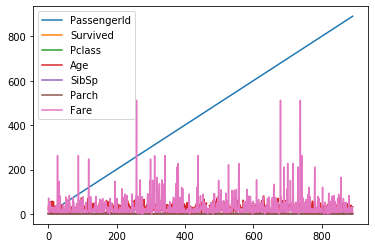

In [ ]:
df.plot()

That *works*, but it plots *all* of the columns at once. That's probably not what we really want. Instead, let's just plot the "Age" variable.

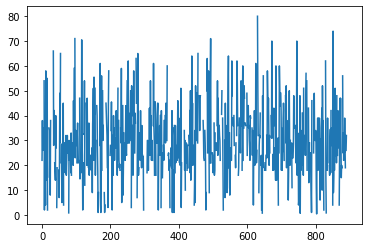

In [ ]:
df['Age'].plot()

That's an improvement, but it's plotting "Age" as a line plot. Probably what we really want is a histogram. To tell `matplotlib` we want a histogram, just add `kind="hist"` to the `plot` command.

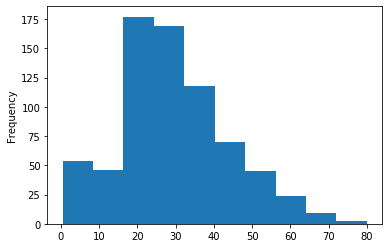

In [ ]:
df['Age'].plot(kind='hist')

If you want more or less bins, you can tell it that as well.

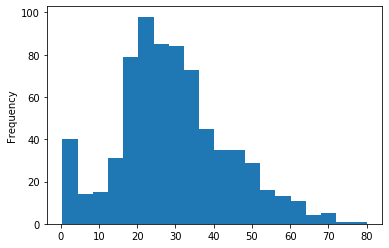

In [ ]:
df['Age'].plot(kind='hist', bins=20)

To see the full list of "kinds" of plots you can make, check out [this link](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html).

So far we've stuck to histograms. Another highly useful graph is a scatter plot, as it allows us to see the interaction between two variables. Similar to above, specify `kind='scatter'`, along with the desired `x` and `y` variables.

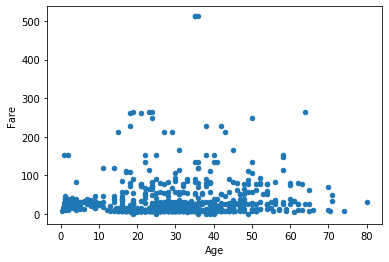

In [ ]:
df.plot(kind='scatter', x='Age', y='Fare')

Let's combine what we've learned, and plot two histograms, one for ticket fare based who passengers who survived, and one for passengers who didn't survive. I've added some extra arguments to make the graphs easier to read. See if you can figure out what they do. One way to do that is to make the graph, then remove items one-by-one, or change the values, and see how the graph changes. If you still can't figure it out, Google it!

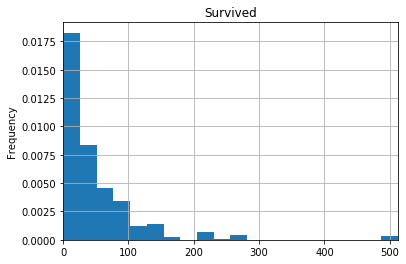

In [ ]:
df[df['Survived']==1]['Fare'].plot(kind="hist", 
                                   xlim=[0, df['Fare'].max()], 
                                   bins=20, 
                                   grid=True, 
                                   title='Survived', 
                                   density=True)

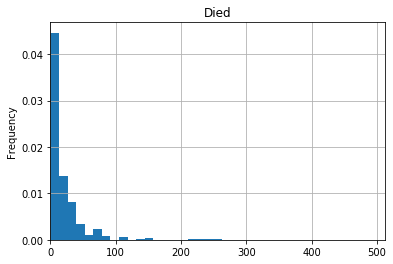

In [ ]:
df[df['Survived']==0]['Fare'].plot(kind="hist", 
                                   xlim=[0, df['Fare'].max()], 
                                   bins=20, 
                                   grid=True, 
                                   title='Died', 
                                   density=True)

So this quick-and-dirty analysis shows that ticket fares were generally higher for those who survived than for those who died.

## Styling your graphs <a id="styling_graphs"></a>

One thing that would be nice is to plot these two histograms on top of one another so that we can get a better comparison between the two groups (rather than having to look at two separate graphs). This *is* possible with how we're plotting, but it's quite ugly. In fact, we'll learn a better way to do graphing later this semester. For now, you can hack around it by just putting both `plot` commands in the same code cell. Again, I have some extra parameters to make the graphs easier to read. You can probaby guess what most of them mean, and [read about the rest](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html).

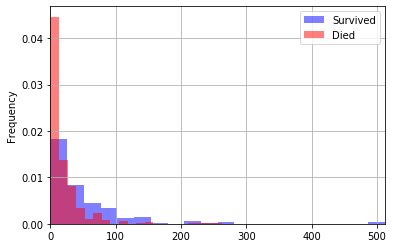

In [ ]:
df[df['Survived']==1]['Fare'].plot(kind="hist", 
                                   xlim=[0, max(df['Fare'])], 
                                   bins=20, 
                                   grid=True, 
                                   density=True, 
                                   legend=True, 
                                   label='Survived', 
                                   color='blue', 
                                   alpha=0.5) 
df[df['Survived']==0]['Fare'].plot(kind="hist", 
                                   xlim=[0, max(df['Fare'])], 
                                   bins=20, 
                                   grid=True, 
                                   density=True, 
                                   legend=True, 
                                   label='Died', 
                                   color='red', 
                                   alpha=0.5)

### Plotting with matplotlib
While we imported `matplotlib` earlier, we did all of our plotting just by calling `df.plot(...)`. This is very limiting, and doesn't allow you to customize a plot exactly how you like. To do that you'll need to work with matplotlib directly. This can be a little confusing at first, but once you start to get familiar with it you will realize how powerful it is.

Matplotlib works with "figures" and "axes". An axes is a plot. This is probably a little different from how you use "axes" in other classes, where you think of them as the x and y axes. But in matplotlib is the graph itself. A "figure" is just a collection of axes. If you only have one plot (thus one axes) we just work with "figure".

In order to create a new figure, call `.figure()`. Then to draw on this figure (i.e. make graphs), simply call `plt.my_graph(my_data, my_options, ...)`. The notation will look very similar to what you did above.

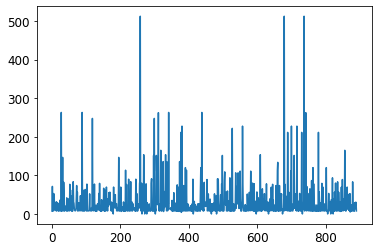

In [ ]:
fig = plt.figure()
ax = df['Fare'].plot()

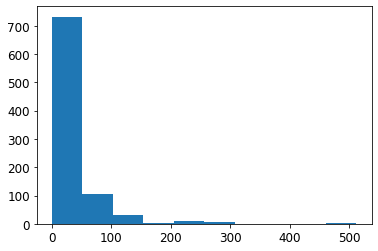

In [ ]:
ax = plt.hist(df['Fare'])

Next, let's try to add some options like we did above with grids, x limits, etc.

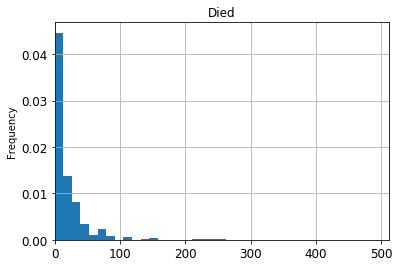

In [ ]:
ax = df[df['Survived']==0]['Fare'].plot(kind="hist", 
                                   xlim=[0, df['Fare'].max()], 
                                   bins=20, 
                                   grid=True, 
                                   title='Died', 
                                   density=True)

At this point you may be wondering why we even bother with matplotlib. It seems like all we're really doing is just saving it to `ax`. But doing it this way gives you a lot more flexibility over what you graph. Below I have made a graph with lots of small styling changes to make it look nicer. You don't need to try and memorize everything below. I just want to demonstrate how powerful matplotlib can be. I found out how to do each of these things by Googling, so you can do it too! 

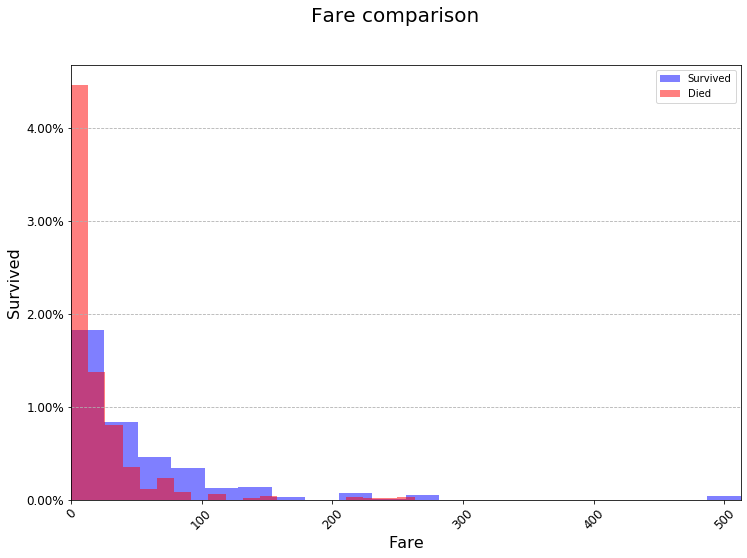

In [ ]:
fig = plt.figure(figsize=(12, 8)) # 12 inches by 8 inches

# Prepare my data
survived_df = df[df['Survived'] == 1]
died_df = df[df['Survived'] == 0]

# Plot the fare of the people who survived
ax = survived_df['Fare'].plot(kind="hist", 
                         xlim=[0, max(df['Fare'])], 
                         bins=20,  
                         density=True, 
                         legend=True, 
                         label='Survived', 
                         color='blue', 
                         alpha=0.5) 

# Plot the fare of the people who died
# We already saved ax as the previous plot, we don't need to do it again for this one. We just want ax to be _something_ so that we can style it below.
died_df['Fare'].plot(kind="hist", 
                         xlim=[0, max(df['Fare'])], 
                         bins=20,  
                         density=True, 
                         legend=True, 
                         label='Died', 
                         color='red', 
                         alpha=0.5) 

# Add grid lines just on the y-axis and make them dashed
# Google query: "matplotlib horizontal grid lines", "matplotlib dashed grid lines"
# Source: https://stackoverflow.com/questions/16074392/getting-vertical-gridlines-to-appear-in-line-plot-in-matplotlib
# Source: https://stackoverflow.com/questions/1726391/matplotlib-draw-grid-lines-behind-other-graph-elements
ax.yaxis.grid(True, linestyle='dashed')

# Set the title and axes labels, and make them bigger
# Google query: "matplotlib set title and axes labels"
# Source: https://stackoverflow.com/questions/12444716/how-do-i-set-the-figure-title-and-axes-labels-font-size-in-matplotlib
fig.suptitle('Fare comparison', fontsize=20)
plt.xlabel('Fare', fontsize=16)
plt.ylabel('Survived', fontsize=16)

# Make the numbers on the x and y axes bigger
# Google query: "matplotlib make axes numbers bigger"
# Source: https://stackoverflow.com/questions/34001751/python-how-to-increase-reduce-the-fontsize-of-x-and-y-tick-labels
ax.tick_params(axis="x", labelsize=12)
ax.tick_params(axis="y", labelsize=12)

# Make the y-axis numbers appear as percentages, not decimal
# Google query: "matplotlib axes as percentages"
# Source: https://stackoverflow.com/questions/31357611/format-y-axis-as-percent
from matplotlib.ticker import PercentFormatter # This important should really be done at the top of the notebook for cleanliness, but leaving it here so you can see where this comes from
ax.yaxis.set_major_formatter(PercentFormatter(1.0)) # The 1.0 is telling the PercentFormatter that the maximum value is 1.0. That is, that my numbers are represented as decimals between 0 and 1 (as opposed to 0 to 100)

# Rotate the x-label labels 45 degrees
ax.tick_params(axis="x", rotation=45)

While this is a lot of code, it allowed us to format the graph exactly the way we wanted, included rotated labels and everything. This is impossible to do only using `df.plot(...)`. You *do not* need to use matplotlib for everything. But it's good to get some practice with it so that when you're making your presentations your graphs look good. Points will absolutely be docked for small, ugly graphs.

What if you want to plot multiple graphs next/on top of each other? You can do this using `plt.subplots(nrows=number_of_rows, ncols=number_of_cols)`. By specifying `nrows` and `ncols` you are essentialy making a table (matrix) of graphs. How do you plot on each of these graphs? `plt.subplots()` returns both the figure (`fig`) and the axes (`ax`). It returns an axes for each graph. Below is an example using two graphs next to each other. After that is an example with four graphs in a square.

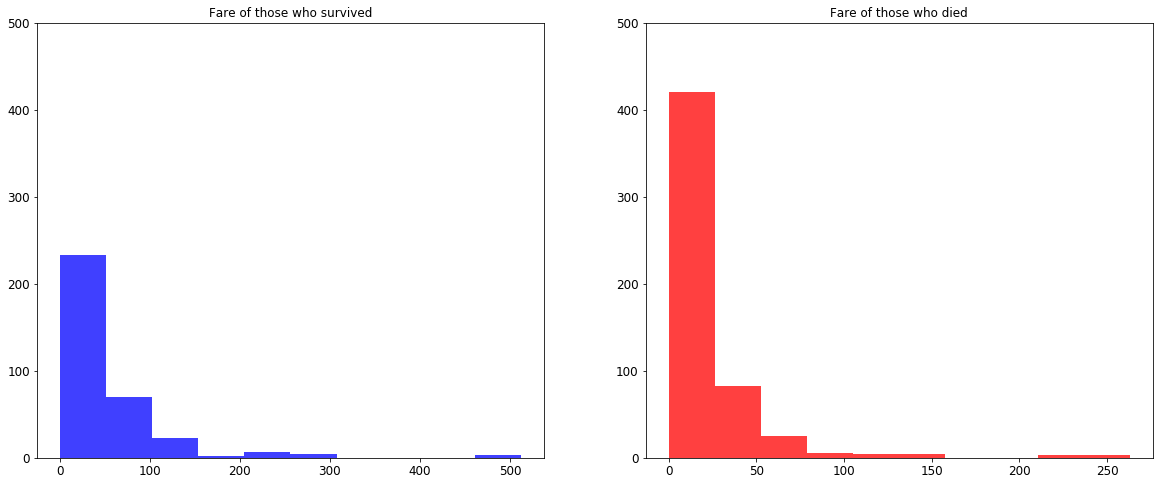

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))
ax1.hist(survived_df['Fare'], color='blue', alpha=0.75)
ax1.set_title('Fare of those who survived')
ax1.set_ylim([0, 500])

ax2.hist(died_df['Fare'], color='red', alpha=0.75)
ax2.set_title('Fare of those who died')
ax2.set_ylim([0, 500]);

(0, 500)

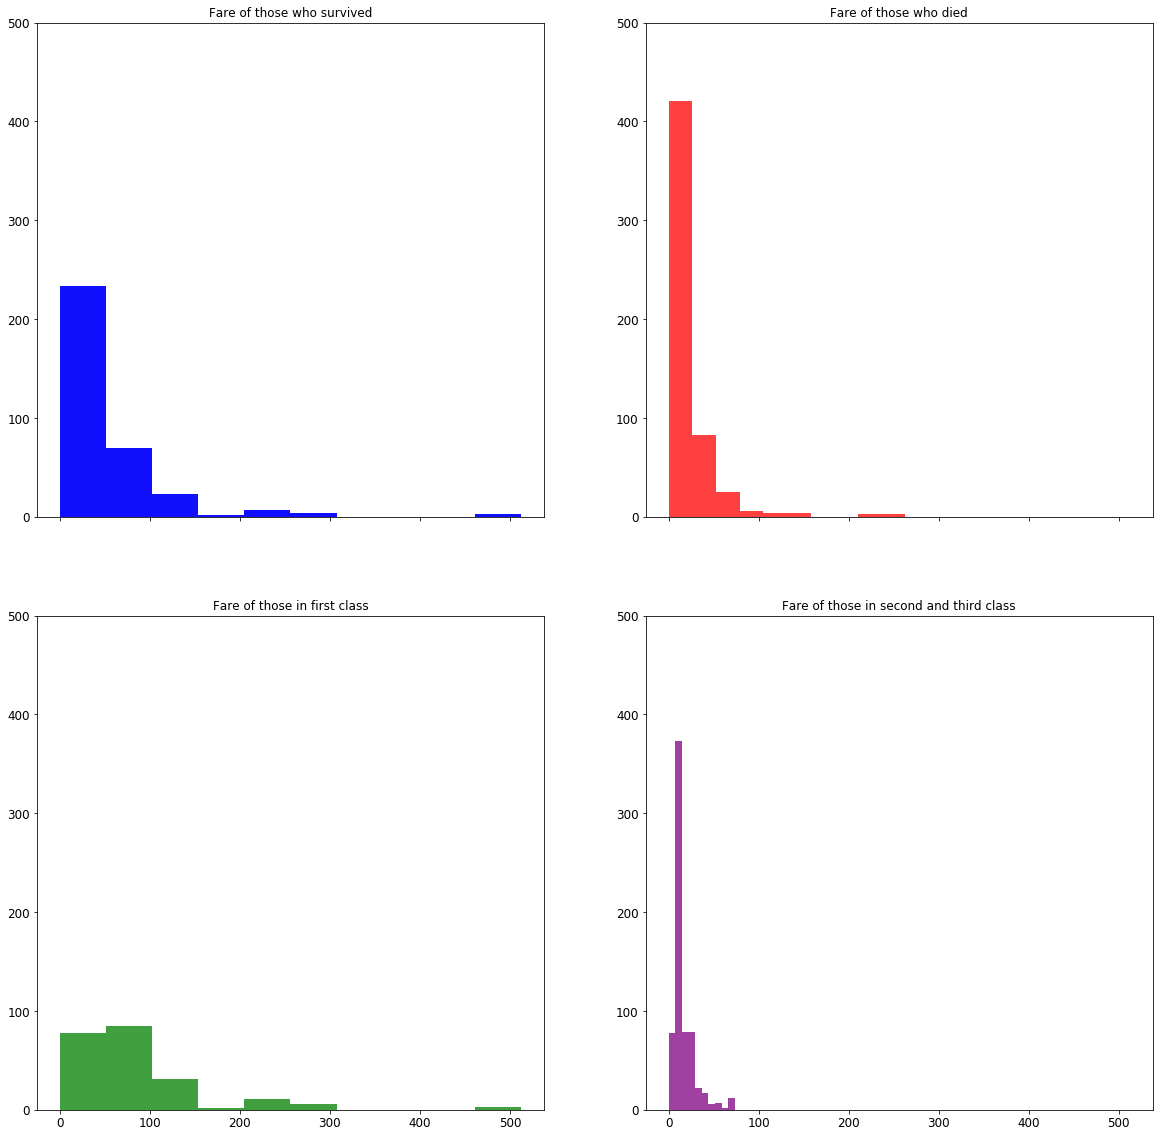

In [ ]:
# Note that we group the axes by the rows. So (ax1, ax2) are the graphs (axes) on the first row, and (ax3, ax4) are the axes on the second row.
# sharex=True tells the graphs to all use the same range for the x-axes.
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20, 20), sharex=True)

# Fare of those who survived
ax1.hist(survived_df['Fare'], color='blue', alpha=0.75)
ax1.set_title('Fare of those who survived')
ax1.set_ylim([0, 500])

# Fare of those who died
ax2.hist(died_df['Fare'], color='red', alpha=0.75)
ax2.set_title('Fare of those who died')
ax2.set_ylim([0, 500])

# Fare of those who survived
ax1.hist(survived_df['Fare'], color='blue', alpha=0.75)
ax1.set_title('Fare of those who survived')
ax1.set_ylim([0, 500])

# Preparing data by "class"
first_class_df = df[df['Pclass'] == 1]
second_third_class_df = df[df['Pclass'].isin([2, 3])]

# Fare for first class
ax3.hist(first_class_df['Fare'], color='green', alpha=0.75)
ax3.set_title('Fare of those in first class')
ax3.set_ylim([0, 500])

# Fare for second and third class
ax4.hist(second_third_class_df['Fare'], color='purple', alpha=0.75)
ax4.set_title('Fare of those in second and third class')
ax4.set_ylim([0, 500])

A great way to get an idea of what sort of graphs you can make is just to go through the [Pandas plotting gallery](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). Then click into the example. Often the examples are fairly complex. But you want to just dive in and find the actual graphing part. Try to guess what each part is doing, then modify it for your purposes. Here are a couple simple graphs taken from there and modified to fit our data.

**Simple scatter plot**

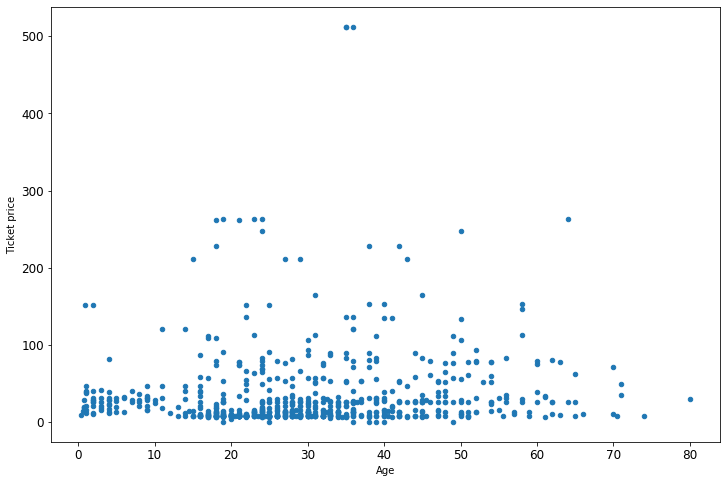

In [ ]:
ax = df.plot(x='Age', y='Fare', kind='scatter', figsize=(12, 8))
ax.set_xlabel('Age')
ax.set_ylabel('Ticket price');

**Horizontal box plot**

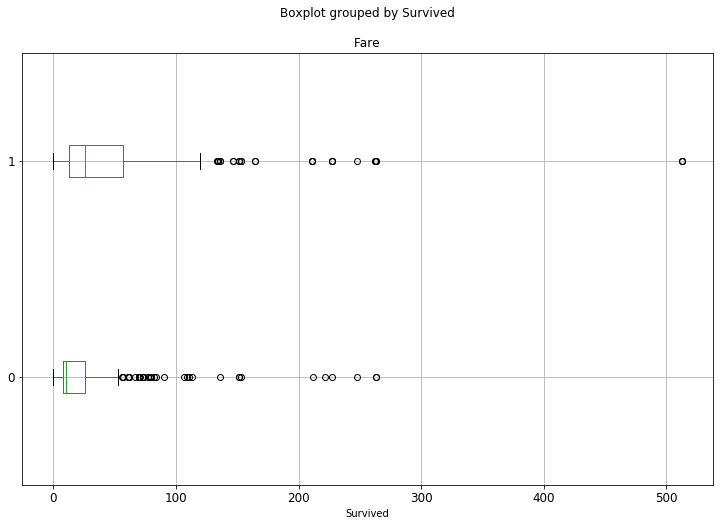

In [ ]:
ax = df.boxplot('Fare', by='Survived', figsize=(12, 8), vert=False)

## Working with dates <a id="dates"></a>
Working with dates is an incredibly important skill to have. It can be a little tricky at first, but once you get the hang of it you can accomplish so much more.

In the data folder for this week is a file called `coronavirus.csv`. It contains the number of coronavirus cases and deaths in each state in the US.

In [ ]:
covid_df = pd.read_csv('data/coronavirus.csv')

In [ ]:
covid_df.head(10)

date       state  cases  deaths  population  overall_deaths  \
0  2020-01-21  Washington      1       0   7614893.0         58587.0   
1  2020-01-22  Washington      1       0   7614893.0         58587.0   
2  2020-01-23  Washington      1       0   7614893.0         58587.0   
3  2020-01-24    Illinois      1       0  12671821.0        110004.0   
4  2020-01-24  Washington      1       0   7614893.0         58587.0   
5  2020-01-25  California      1       0  39512223.0        282520.0   
6  2020-01-25    Illinois      1       0  12671821.0        110004.0   
7  2020-01-25  Washington      1       0   7614893.0         58587.0   
8  2020-01-26     Arizona      1       0   7278717.0         60523.0   
9  2020-01-26  California      2       0  39512223.0        282520.0   

   migration  
0    24103.0  
1    24103.0  
2    24103.0  
3    19209.0  
4    24103.0  
5    74028.0  
6    19209.0  
7    24103.0  
8     7782.0  
9    74028.0

We can see that each state appears multiple times, because the data measures the number of cases every day. So for instance, Washington has a measurement for January 21st, then January 22nd, etc. Some states don't have measurements on certain days. Before we get into grouping, let's explore our data a little. The questions I want to answer are:

1. Is the data good quality? Do we have missing values? Are all columns the appropriate data types?
2. Are all states represented?
3. How many measurements do each state have?
4. What is the date range?

**1. Is the data good quality?**

In [ ]:
covid_df.dtypes

date               object
state              object
cases               int64
deaths              int64
population        float64
overall_deaths    float64
migration         float64
dtype: object

So `date` is a string (object), and so is `state`. Obviously `state` should be a string (it's text), but I would really like `date` to be a, well, date. Python represents dates as a `datetime`, which is exactly what it sounds like, a date together with a time. Pandas has a simple helper function to convert strings (objects) to datetimes, called `pd.to_datetime()`. Even if your data doesn't have a time (like ours doesn't, it's just the date of the measurement) there's nothing wrong with having a datetime. It will just use a time of midnight.

In [ ]:
covid_df['date'] = pd.to_datetime(covid_df['date'])

Let's look at the data types again.

In [ ]:
covid_df.dtypes

date              datetime64[ns]
state                     object
cases                      int64
deaths                     int64
population               float64
overall_deaths           float64
migration                float64
dtype: object

Now the dates are represented as datetimes. Let's look at the data again.

In [ ]:
covid_df.head()

date       state  cases  deaths  population  overall_deaths  migration
0 2020-01-21  Washington      1       0   7614893.0         58587.0    24103.0
1 2020-01-22  Washington      1       0   7614893.0         58587.0    24103.0
2 2020-01-23  Washington      1       0   7614893.0         58587.0    24103.0
3 2020-01-24    Illinois      1       0  12671821.0        110004.0    19209.0
4 2020-01-24  Washington      1       0   7614893.0         58587.0    24103.0

Hmm, it doesn't look any different. The `date` column still looks exactly like it did before. So what did we really accomplish? Lot's, actually! Here are some great things we can do now:

In [ ]:
# Get the year, month and day of a measurement
tenth_measurement = covid_df['date'].iloc[10]
print(f'The tenth measurement occurred in {tenth_measurement.year} in month {tenth_measurement.month} and day {tenth_measurement.day}')

The tenth measurement occurred in 2020 in month 1 and day 26


In [ ]:
# Find the difference in time between two measurements
hundredth_measurement = covid_df['date'].iloc[100]

time_diff = hundredth_measurement - tenth_measurement
print(f'The time difference between the first and tenth measurement is {time_diff}')

The time difference between the first and tenth measurement is 17 days 00:00:00


In [ ]:
# Add time together
print(f'The tenth measurement occurred on {tenth_measurement}. One week after that was {tenth_measurement + datetime.timedelta(weeks=1)}')

The tenth measurement occurred on 2020-01-26 00:00:00. One week after that was 2020-02-02 00:00:00


In [ ]:
# Get days of the week
print(f'The tenth measurement occured on a {tenth_measurement.weekday()}')
# Hmm, that's a litle annoying, what day of the week is "6"?
print(f'The tenth measurement occured on a {tenth_measurement.strftime("%A")}')

The tenth measurement occured on a 6
The tenth measurement occured on a Sunday


We used `.strftime()` in that last example. That is a way to convert dates to strings. [Here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) is all the ways you can change dates to strings.  

Do we have missing values?

In [ ]:
covid_df.isna().sum()

date               0
state              0
cases              0
deaths             0
population        25
overall_deaths    25
migration         25
dtype: int64

Yes! The fact that there are 25 of each is funny, let's look at them.

In [ ]:
covid_df[covid_df['population'].isna()]

date           state  cases  deaths  population  overall_deaths  \
684  2020-03-14  Virgin Islands      1       0         NaN             NaN   
700  2020-03-15            Guam      3       0         NaN             NaN   
737  2020-03-15  Virgin Islands      1       0         NaN             NaN   
753  2020-03-16            Guam      3       0         NaN             NaN   
790  2020-03-16  Virgin Islands      2       0         NaN             NaN   
806  2020-03-17            Guam      3       0         NaN             NaN   
843  2020-03-17  Virgin Islands      2       0         NaN             NaN   
860  2020-03-18            Guam      8       0         NaN             NaN   
897  2020-03-18  Virgin Islands      3       0         NaN             NaN   
914  2020-03-19            Guam     12       0         NaN             NaN   
951  2020-03-19  Virgin Islands      3       0         NaN             NaN   
968  2020-03-20            Guam     14       0         NaN             NaN   
1005 2020-03-20  Virgin Islands      6       0         NaN             NaN   
1022 2020-03-21            Guam     15       0         NaN             NaN   
1059 2020-03-21  Virgin Islands      6       0         NaN             NaN   
1076 2020-03-22            Guam     27       1         NaN             NaN   
1113 2020-03-22  Virgin Islands     17       0         NaN             NaN   
1130 2020-03-23            Guam     29       1         NaN             NaN   
1167 2020-03-23  Virgin Islands     17       0         NaN             NaN   
1184 2020-03-24            Guam     32       1         NaN             NaN   
1221 2020-03-24  Virgin Islands     17       0         NaN             NaN   
1238 2020-03-25            Guam     32       1         NaN             NaN   
1275 2020-03-25  Virgin Islands     17       0         NaN             NaN   
1292 2020-03-26            Guam     49       1         NaN             NaN   
1329 2020-03-26  Virgin Islands     17       0         NaN             NaN   

      migration  
684         NaN  
700         NaN  
737         NaN  
753         NaN  
790         NaN  
806         NaN  
843         NaN  
860         NaN  
897         NaN  
914         NaN  
951         NaN  
968         NaN  
1005        NaN  
1022        NaN  
1059        NaN  
1076        NaN  
1113        NaN  
1130        NaN  
1167        NaN  
1184        NaN  
1221        NaN  
1238        NaN  
1275        NaN  
1292        NaN  
1329        NaN

It seems like perhaps the problem is that the Virgin Islands and Guam don't have much data. So let's just drop those (sorry Virgin Islands and Guam...) and then check again.

In [ ]:
covid_df = covid_df.dropna(how='any')

In [ ]:
covid_df.isna().sum()

date              0
state             0
cases             0
deaths            0
population        0
overall_deaths    0
migration         0
dtype: int64

Great, we can move on. The columns "population", "overall_deaths" and "migration" probably don't need to be decimals, so let's just make them all integers. We'll also check that there's no negatives or crazy values.

In [ ]:
covid_df['population'] = covid_df['population'].astype('int')
covid_df['overall_deaths'] = covid_df['overall_deaths'].astype('int')
covid_df['migration'] = covid_df['migration'].astype('int')

<ipython-input-133-3c34e4f278f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['population'] = covid_df['population'].astype('int')
<ipython-input-133-3c34e4f278f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df['overall_deaths'] = covid_df['overall_deaths'].astype('int')
<ipython-input-133-3c34e4f278f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

Pandas is picky about how you access data, so it's throwing a warning (not an error) here. You can fix that by using `covid_df.loc['my_col', ].astype('int')` instead. But to be honest I never bother with it and just ignore the warning.

In [ ]:
covid_df.dtypes

date              datetime64[ns]
state                     object
cases                      int64
deaths                     int64
population                 int64
overall_deaths             int64
migration                  int64
dtype: object

Okay, data types look good now. Let's move on to the second question: 

**2. Are all states represented?**

In [ ]:
covid_df['state'].nunique()

52

There are 52 because of DC and Puerto Rico.

**3. How many measurements does each state have?**

In [ ]:
covid_df['state'].value_counts()

Washington              67
Illinois                64
California              63
Arizona                 62
Massachusetts           56
Wisconsin               52
Texas                   45
Nebraska                40
Utah                    32
Oregon                  29
Rhode Island            27
Florida                 27
New York                27
Georgia                 26
New Hampshire           26
North Carolina          25
New Jersey              24
Tennessee               23
Nevada                  23
Colorado                23
Maryland                23
Oklahoma                22
Pennsylvania            22
Minnesota               22
Hawaii                  22
Indiana                 22
Kentucky                22
South Carolina          22
Missouri                21
Vermont                 21
Kansas                  21
Virginia                21
District of Columbia    21
Connecticut             20
Iowa                    20
Ohio                    19
Louisiana               19
M

**4. What is the date range?**

This is where it will be helpful that I converted the date column into actual dates. If it were just strings then Python has no way of knowing that '2020-01-02' > '2020-01-01' (for instance).

```{warning}
An error is coming!
```

In [ ]:
# An error is coming...
print(f'Earliest date: {covid_df['date'].min()}, latest date: {covid_df['date'].max()}')

SyntaxError: invalid syntax (<ipython-input-140-a544337c2bea>, line 2)

What happened here? The problem is that we're using single quotes `'` for two different things: One is for the `print` statement, and another is to access the column inside covid_df. So Python gets confused and doesn't know that they're different. The way to fix this is to just use two different kinds of quotes. One can be single quotes `'`, and one can be double quotes `"`. These mean exactly the same thing to Python, but by putting different ones it understands that you're using them for two different purposes.

In [ ]:
# Notice that I used double quotes " to access the date column, and single quotes ' for the print statement. It would also work just fine if you switched those two.
print(f'Earliest date: {covid_df["date"].min()}, latest date: {covid_df["date"].max()}')

Earliest date: 2020-01-21 00:00:00, latest date: 2020-03-27 00:00:00


## Grouping the data <a id="groupby"></a>

What would happen if we tried to plot how many cases are in each state?

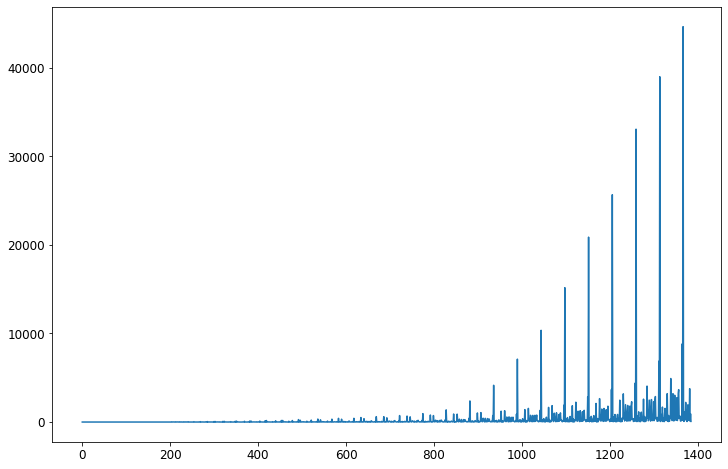

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = covid_df['cases'].plot()

What is this? I have no idea what the x-axis is (presumably the y-axis is the number of cases). The problem is that each state appears many times in my dataset. As we saw above, Washington appears 67 times (for instance), and West Virginia appears 11 times. So each appearance is getting its own bar. We could (sort of) fix this by selecting one state and working with it.

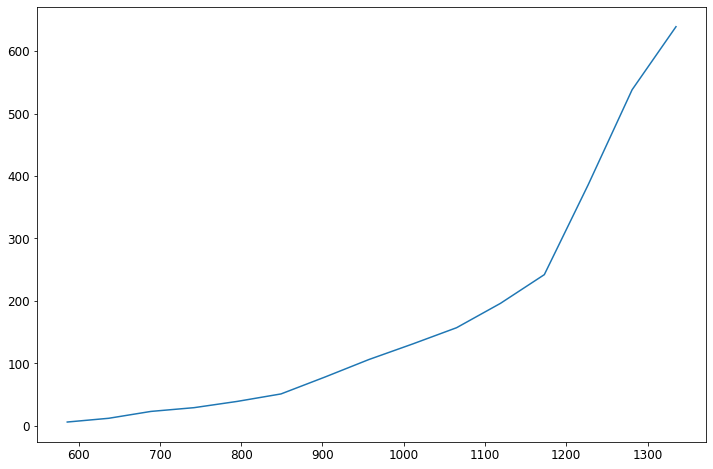

In [ ]:
was_df = covid_df[covid_df['state'] == 'Alabama']
fig = plt.figure(figsize=(12, 8))
ax = was_df['cases'].plot()

That's better, but do I really want to do that for all 50 states + DC and Puerto Rico? What I need is to *group* the states together. That way I can see *summaries* for each state, such as the total number of cases, total number of deaths, etc. To do that I need to use the `groupby` Python function. This function can be a little tricky. Let's start with some simple examples before we jump into graphing.

To use `groupby`, you need to supply your dataframe, and also tell Pandas what column(s) you want to group by.

In [ ]:
covid_df.groupby('state')

We can see that it doesn't really return anything immediately useful. It returns a `DataFrameGroupBy` object, whatever that is. Well, what it is something you can iterate over using a `for` loop (for instance). Let's do just one loop then use `break` to stop the loop. That way we don't need to have 52 things printed out.

In [ ]:
for name, group in covid_df.groupby('state'):
    print(f'This group is name {name}. Below is the group.')
    print(group)
    break

This group is name Alabama. Below is the group.
           date    state  cases  deaths  population  overall_deaths  migration
586  2020-03-13  Alabama      6       0     4903185           53879       2772
637  2020-03-14  Alabama     12       0     4903185           53879       2772
689  2020-03-15  Alabama     23       0     4903185           53879       2772
742  2020-03-16  Alabama     29       0     4903185           53879       2772
795  2020-03-17  Alabama     39       0     4903185           53879       2772
849  2020-03-18  Alabama     51       0     4903185           53879       2772
903  2020-03-19  Alabama     78       0     4903185           53879       2772
957  2020-03-20  Alabama    106       0     4903185           53879       2772
1011 2020-03-21  Alabama    131       0     4903185           53879       2772
1065 2020-03-22  Alabama    157       0     4903185           53879       2772
1119 2020-03-23  Alabama    196       0     4903185           53879       2772
1173

We can see that `groupby` returns two things: The name of the group, which is just the value in the column you provided. Since we provided "state", it's returning the state, which in this case in Alabama. Then it provides a DataFrame with only that value. So here, the DataFrame returned is all measurements for Alabama. This is exactly the same thing as we got above! Except now, rather than telling Pandas "give us all measurements for Alabama", it just does it on its own.

Why is this useful? Because we can compute some summary statistics for each individual group (state). Let's compute the number of measurements for each state.

In [ ]:
for name, group in covid_df.groupby('state'):
    print(f'{name} has {group.shape[0]} measurements')

Alabama has 15 measurements
Alaska has 16 measurements
Arizona has 62 measurements
Arkansas has 17 measurements
California has 63 measurements
Colorado has 23 measurements
Connecticut has 20 measurements
Delaware has 17 measurements
District of Columbia has 21 measurements
Florida has 27 measurements
Georgia has 26 measurements
Hawaii has 22 measurements
Idaho has 15 measurements
Illinois has 64 measurements
Indiana has 22 measurements
Iowa has 20 measurements
Kansas has 21 measurements
Kentucky has 22 measurements
Louisiana has 19 measurements
Maine has 16 measurements
Maryland has 23 measurements
Massachusetts has 56 measurements
Michigan has 18 measurements
Minnesota has 22 measurements
Mississippi has 17 measurements
Missouri has 21 measurements
Montana has 15 measurements
Nebraska has 40 measurements
Nevada has 23 measurements
New Hampshire has 26 measurements
New Jersey has 24 measurements
New Mexico has 17 measurements
New York has 27 measurements
North Carolina has 25 measureme

So easy! With just two lines of code we were able to compute things about all 52 states + territories. Let's add up the number of cases each day. Rather than printing them out let's save them as a dictionary.

In [ ]:
cases_by_state = {}

for name, group in covid_df.groupby('state'):
    cases_by_state[name] = group['cases'].sum()

In [ ]:
cases_by_state

{'Alabama': 2633,
 'Alaska': 382,
 'Arizona': 2695,
 'Arkansas': 2039,
 'California': 27813,
 'Colorado': 8609,
 'Connecticut': 5390,
 'Delaware': 858,
 'District of Columbia': 1644,
 'Florida': 14172,
 'Georgia': 9847,
 'Hawaii': 720,
 'Idaho': 845,
 'Illinois': 14013,
 'Indiana': 3380,
 'Iowa': 1235,
 'Kansas': 986,
 'Kentucky': 1495,
 'Louisiana': 12798,
 'Maine': 1068,
 'Maryland': 3429,
 'Massachusetts': 12863,
 'Michigan': 14972,
 'Minnesota': 2325,
 'Mississippi': 2580,
 'Missouri': 2391,
 'Montana': 517,
 'Nebraska': 1188,
 'Nevada': 3044,
 'New Hampshire': 1079,
 'New Jersey': 32692,
 'New Mexico': 944,
 'New York': 207609,
 'North Carolina': 3651,
 'North Dakota': 361,
 'Ohio': 4910,
 'Oklahoma': 1216,
 'Oregon': 2296,
 'Pennsylvania': 8451,
 'Puerto Rico': 276,
 'Rhode Island': 1141,
 'South Carolina': 2881,
 'South Dakota': 346,
 'Tennessee': 5519,
 'Texas': 8901,
 'Utah': 2546,
 'Vermont': 855,
 'Virginia': 3081,
 'Washington': 26604,
 'West Virginia': 323,
 'Wisconsin': 4

Now we can easily make this into a Pandas Series. It's a Series and not a DataFrame because there's only one column. DataFrames are for when you have multiple columns.

In [ ]:
cases_by_state_df = pd.Series(cases_by_state)

In [ ]:
cases_by_state_df.head()

Alabama        2633
Alaska          382
Arizona        2695
Arkansas       2039
California    27813
dtype: int64

Now let's plot this.

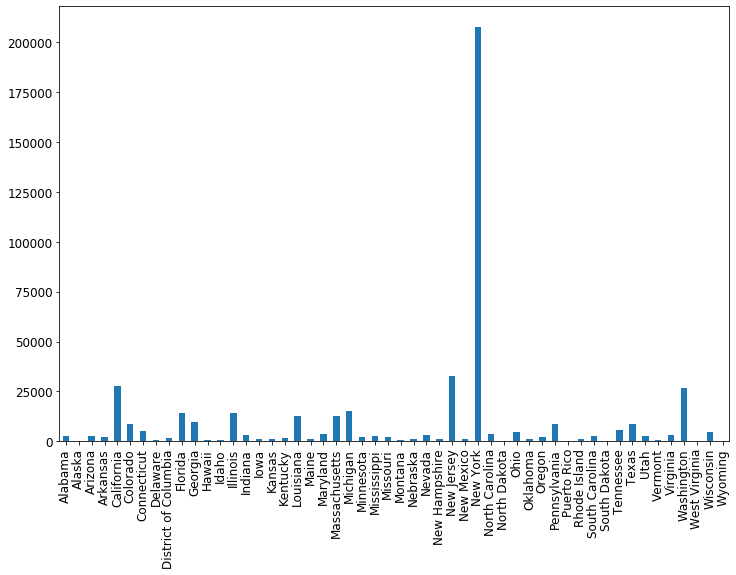

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = cases_by_state_df.plot(kind="bar")

Awesome! To make it nicer, let's order the states so that the cases are increasing from left to right. We can do this using the Pandas helper function `sort_values`

In [ ]:
cases_by_state_df = cases_by_state_df.sort_values(ascending=True)

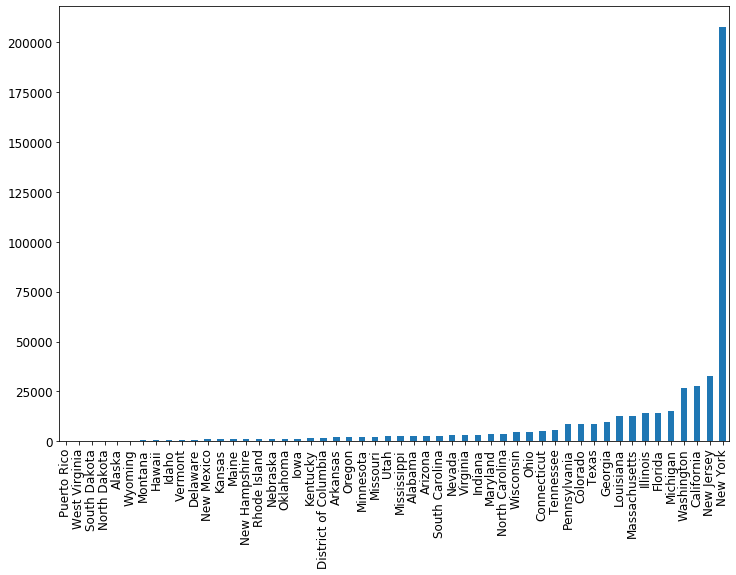

In [ ]:
fig = plt.figure(figsize=(12, 8))
ax = cases_by_state_df.plot(kind='bar')

Let's use `groupby` to make a dataframe summarizing all the states. We'll include the total number of cases, deaths, and also both as a percentage of the population. To get the total number we'll just use `.sum()` on each group, which will sum up the number of cases/deaths each day. To make it into a percentage we'll divide by the population. The population is the same every day, so we'll just take the first time the population shows up (`.iloc[0]`) and use that value.

In [ ]:
state_summaries = []

for state, group in covid_df.groupby('state'):
    state_summaries.append([state, group['cases'].sum(), group['deaths'].sum(), group['cases'].sum() / group['population'].iloc[0], group['deaths'].sum() / group['population'].iloc[0]])

In [ ]:
state_summaries_df = pd.DataFrame(state_summaries, columns=['state', 'total_cases', 'total_deaths', 'cases_pct_of_population' , 'deaths_pct_of_population'])

In [ ]:
state_summaries_df.head()

state  total_cases  total_deaths  cases_pct_of_population  \
0     Alabama         2633             8                 0.000537   
1      Alaska          382             1                 0.000522   
2     Arizona         2695            41                 0.000370   
3    Arkansas         2039            10                 0.000676   
4  California        27813           524                 0.000704   

   deaths_pct_of_population  
0                  0.000002  
1                  0.000001  
2                  0.000006  
3                  0.000003  
4                  0.000013

Let's also plot the deaths by state in a similar way.

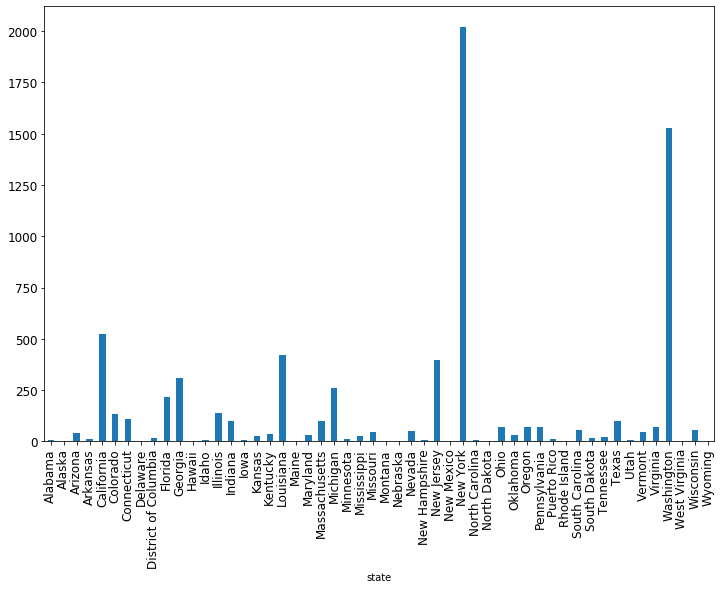

In [ ]:
state_summaries_df.plot(x='state', y='total_deaths', kind='bar', figsize=(12, 8), legend=False)

There are many, many more things you can do with grouping and plotting, this is just scratching the surface. But hopefully you now have a roadmap for how to start. As you'll continue to learn throughout this class, Google is your friend. When you want to try something new, or something you thought would work doesn't and you can't fix it, Google it! With that, let's get to the exercises.

## Exercises

### Titanic dataset

1. Is there any relationship between the `Embarked` variable and anything else?
2. What is the relationship between `Age` and `Survived`? 
3. So far we've been asking about the relationship between just two variables: `Age` and `Survived`, `Embarked` and something else, etc. How would you go about exploring the relationship between *three or more* variables? Perhaps `Survived` is dependent on `Age`, `Fare`, `Sex`, `SibSp` and `Parch`. How could you explore this? Try using various graphs to see.

### Boston housing prices dataset
In the data folder for this homework is another dataset called `boston.csv`. This dataset contains info on neighborhoods in Boston, measures in the 1980's. Open up that data and go through similar steps to what you've done in this homework and homework 1. Then, answer the following questions:
1. How many rows have a missing value? Drop any rows with a missing value.
2. What is the data type for each column once you load the data using Pandas? Fix any data types that are incorrectly loaded.
3. What is the minimum, median, mean and maximum house prices?
4. Make three histograms for three different columns that you find interesting. Make sure your histogram has a title, looks nice, etc.
5. Make three scatter plots, each with the house price being the y-value. Pick three columns you think might have a relationship with the house price, and put those on the x-axis.
6. What factors seem to have the strongest influence on the house price? Why do you say that?
7. Write several paragraphs describing what you have learned. This should be something that you could present to your boss if (s)he said "go look into this for me and give me a summary of what I should know."